# Training Neural Networks with Keras

### Goals: 
- Intro: train a neural network with high level framework `Keras`

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [1]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

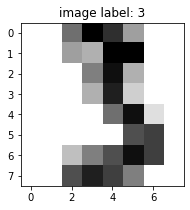

In [2]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- normalization
- train/test split

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

Let's display the one of the transformed sample (after feature standardization):

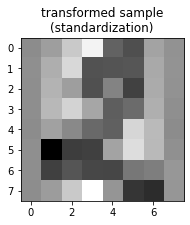

In [4]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample (thanks to scaler.inverse_transform):

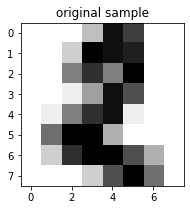

In [5]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [6]:
print(X_train.shape, y_train.shape)

(1527, 64) (1527,)


In [7]:
print(X_test.shape, y_test.shape)

(270, 64) (270,)


# I) Feed Forward NN with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://keras.io/getting-started/sequential-model-guide/
- Experiment with different optimizers, activations, size of layers, initializations

### a) Keras Workflow

To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [8]:
y_train[:3]

array([2, 9, 5])

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values (we put a 1 to indicate what element it is):

In [10]:
import keras
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

# nb of pixels
N = X_train.shape[1]
# nb of hidden units (not layers)
H = 100
# nb of classes
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
# output activation, softmax : classifier
model.add(Activation("softmax"))

# optimizers.SGD = Stochastical Gradient Descent
model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

# epochs : nb de fois que le modèle va tourner
# batch size : nombre d'éléments sur lequel entrainer (si le batch size = taille du training set, l'optimiseur sera le gradient descent tout court, plus le stochasic)
model.fit(X_train, Y_train, epochs=15, batch_size=32);

# a chaque passage, on voit la fonction de cost diminuer
# acc donne la proba de la prédiction
# en dbut de ligne, on a le temps que ça a pris

Epoch 1/15
1527/1527 [==============================] - 1s 389us/step - loss: 0.8233 - acc: 0.7917
Epoch 2/15
1527/1527 [==============================] - 0s 66us/step - loss: 0.2792 - acc: 0.9424
Epoch 3/15
1527/1527 [==============================] - 0s 96us/step - loss: 0.1921 - acc: 0.9646
Epoch 4/15
1527/1527 [==============================] - 0s 90us/step - loss: 0.1494 - acc: 0.9731
Epoch 5/15
1527/1527 [==============================] - 0s 83us/step - loss: 0.1230 - acc: 0.9797
Epoch 6/15
1527/1527 [==============================] - 0s 94us/step - loss: 0.1050 - acc: 0.9849
Epoch 7/15
1527/1527 [==============================] - 0s 91us/step - loss: 0.0915 - acc: 0.9856
Epoch 8/15
1527/1527 [==============================] - 0s 93us/step - loss: 0.0811 - acc: 0.9876
Epoch 9/15
1527/1527 [==============================] - 0s 88us/step - loss: 0.0725 - acc: 0.9895
Epoch 10/15
1527/1527 [==============================] - 0s 89us/step - loss: 0.0659 - acc: 0.9895
Epoch 11/15
1527/1

### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
**Notes**: 

The keras API documentation is available at:

https://keras.io/

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

It is also possible to type the beginning of a function call / constructor and type "shift-tab" after the opening paren:

```python
optimizers.SGD(<shiff-tab>
```

- Add momentum and nesterov
- Change the activation to be Relu instead of tanh
- And use the Adam optimizer

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

# nb of pixels
N = X_train.shape[1]
# nb of hidden units (not layers)
H = 100
# nb of classes
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(H))
model.add(Activation("relu"))
model.add(Dense(K))
# output activation, softmax : classifier
model.add(Activation("softmax"))

# optimizers.SGD = Stochastical Gradient Descent with momentum and nesterov
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

# epochs : nb de fois que le modèle va tourner
# batch size : nombre d'éléments sur lequel entrainer (si le batch size = taille du training set, l'optimiseur sera le gradient descent tout court, plus le stochasic)
model.fit(X_train, Y_train, epochs=15, batch_size=32);

# a chaque passage, on voit la fonction de cost diminuer
# acc donne la proba de la prédiction
# en dbut de ligne, on a le temps que ça a pris

Epoch 1/15
1527/1527 [==============================] - 2s 1ms/step - loss: 1.4063 - acc: 0.6293
Epoch 2/15
1527/1527 [==============================] - 0s 156us/step - loss: 0.4024 - acc: 0.9122
Epoch 3/15
1527/1527 [==============================] - 0s 137us/step - loss: 0.1857 - acc: 0.9646 0s - loss: 0.2269 - acc: 0.9
Epoch 4/15
1527/1527 [==============================] - 0s 139us/step - loss: 0.1118 - acc: 0.9764
Epoch 5/15
1527/1527 [==============================] - 0s 125us/step - loss: 0.0740 - acc: 0.9856
Epoch 6/15
1527/1527 [==============================] - 0s 134us/step - loss: 0.0532 - acc: 0.9908
Epoch 7/15
1527/1527 [==============================] - 0s 141us/step - loss: 0.0394 - acc: 0.9948
Epoch 8/15
1527/1527 [==============================] - 0s 122us/step - loss: 0.0281 - acc: 0.9961
Epoch 9/15
1527/1527 [==============================] - 0s 96us/step - loss: 0.0215 - acc: 0.9980
Epoch 10/15
1527/1527 [==============================] - 0s 99us/step - loss: 0.016

In [ ]:
# %load solutions/keras_sgd_and_momentum.py

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

  Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

- Bonus: try the Adadelta optimizer (no learning rate to set).



In [ ]:
# %load solutions/keras_adam_and_adadelta.py

### c) Exercises: forward pass and generalization

- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set

In [ ]:
# %load solutions/keras_accuracy_on_test_set.py

## d) Home assignment: impact of initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [ ]:
from keras import initializers

normal_init = initializers.RandomNormal(stddev=0.01)

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.layers

Let's have a look at the parameters of the first layer after initialization but before any training has happened:

In [ ]:
model.layers[0].weights

In [ ]:
w = model.layers[0].weights[0].eval(keras.backend.get_session())
w

In [ ]:
w.std()

In [ ]:
b = model.layers[0].weights[1].eval(keras.backend.get_session())
b

In [ ]:
history = model.fit(X_train, Y_train,
                    epochs=15, batch_size=32)

#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `scale=1e-3`
  - a larger scale e.g. `scale=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are more advanced solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

In [ ]:
# %load solutions/keras_initializations.py

In [ ]:
# %load solutions/keras_initializations_analysis.py